In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/chris/Desktop/uf_grad_school/uf-class-repo/radiative-processes/final-project/'

In [39]:
falc_cols = ['height','tau','m','temp','turb_vel','n_H','n_p','n_e','ptot','beta','rho']
solspect_cols = ['wave','smoothed_flux','continuum_flux','smoothed_intensity','continuum_intensity']

falc_data = pd.read_csv(path+'falc.dat.txt',delimiter=r'\s+', header=None, 
                        names=falc_cols,engine='python',comment='#')

solspect_data = pd.read_csv('./solspect.dat.txt',delimiter=r'\s+', header=None, 
                            names=solspect_cols,engine='python',comment='#')

In [40]:
falc_data

,height,tau,m,temp,turb_vel,n_H,n_p,n_e,ptot,beta,rho
0,2218.20,0.000000e+00,0.000007,100000,11.73,5.575000e+09,5.575000e+09,6.665000e+09,0.1857,0.952,1.306000e-14
1,2216.50,7.696000e-10,0.000007,95600,11.65,5.838000e+09,5.837000e+09,6.947000e+09,0.1857,0.950,1.368000e-14
2,2214.89,1.531000e-09,0.000007,90816,11.56,6.151000e+09,6.150000e+09,7.284000e+09,0.1858,0.948,1.441000e-14
3,2212.77,2.597000e-09,0.000007,83891,11.42,6.668000e+09,6.667000e+09,7.834000e+09,0.1859,0.945,1.562000e-14
4,2210.64,3.754000e-09,0.000007,75934,11.25,7.381000e+09,7.378000e+09,8.576000e+09,0.1860,0.941,1.729000e-14
...,...,...,...,...,...,...,...,...,...,...,...
75,-60.00,5.858000e+00,6.174000,8220,1.77,1.307000e+17,1.022000e+15,1.050000e+15,169100.0000,0.972,3.062000e-07
76,-70.00,8.362000e+00,6.481000,8540,1.79,1.317000e+17,1.515000e+15,1.546000e+15,177600.0000,0.972,3.085000e-07
77,-80.00,1.196000e+01,6.790000,8860,1.80,1.325000e+17,2.180000e+15,2.215000e+15,186000.0000,0.973,3.104000e-07
78,-90.00,1.695000e+01,7.102000,9140,1.82,1.337000e+17,2.942000e+15,2.979000e+15,194600.0000,0.973,3.134000e-07


### a

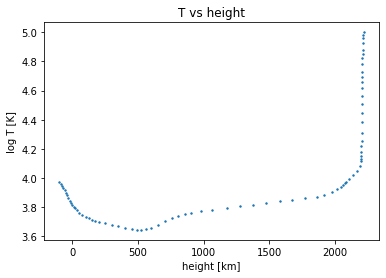

In [41]:
### part a
plt.scatter(falc_data.height, np.log10(falc_data.temp), s=2)
plt.title('T vs height')
plt.ylabel('log T [K]')
plt.xlabel('height [km]')
plt.show()

As can be seen by how the temperature profile evolves with atmosphere height, the initial drop in temperature corresponds with the photosphere; the subsequent rise from ~500 km above the surface corresponds with the chromosphere; and the abrupt rise in temperature near ~2000 km corresponds with the transition region and the corona.

Absorption lines typically form in the cooler parts of the atmosphere (the top of the photosphere and bottom of the chromosphere), while emission lines typically form in the hotter parts of the atmosphere (the upper chromosphere and the corona).

### b

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


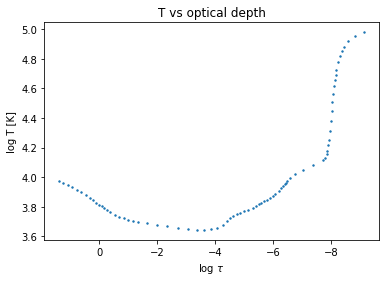

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


    height     tau      m  temp  turb_vel           n_H           n_p  \
67    20.0  0.6746  3.869  6180      1.52  1.098000e+17  2.588000e+13   

             n_e      ptot   beta           rho  
67  4.064000e+13  106000.0  0.972  2.572000e-07  


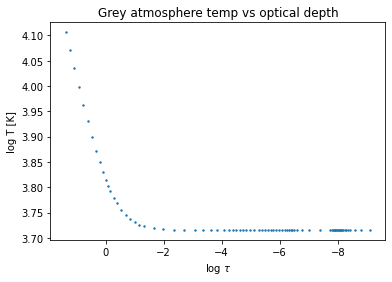

In [42]:
### part b
plt.scatter(np.log10(falc_data.tau), np.log10(falc_data.temp), s=2)
plt.title('T vs optical depth')
plt.ylabel('log T [K]')
plt.xlabel(r'log $\tau$')
plt.gca().invert_xaxis()
plt.show()

### compare this to grey atmosphere using Eddington-Milne approximation
# find row with tau closest to 2/3 for Teff
where_is_tau_two_thirds = falc_data.loc[(falc_data.tau > 0.63) & (falc_data.tau < 0.68)].index[0]
print(falc_data.loc[(falc_data.tau > 0.63) & (falc_data.tau < 0.68)])

# find teff, aka temp at tau=2/3 in order to calcluate grey atmosphere
teff = falc_data.iloc[where_is_tau_two_thirds].temp 
def grey_atm(tau, teff):
    temp = teff*(0.75*tau + 0.5)**0.25
    
    return temp

grey_atm_temp = grey_atm(falc_data.tau, teff)
plt.scatter(np.log10(falc_data.tau), np.log10(grey_atm_temp), s=2)
#plt.scatter(np.log10(falc_data.tau), grey_atm(falc_data.tau, teff), s=2)
plt.title('Grey atmosphere temp vs optical depth')
plt.ylabel('log T [K]')
plt.xlabel(r'log $\tau$')
plt.gca().invert_xaxis()
plt.show()

A grey atmosphere using the Eddington-Milne approximation appropriately models the photosphere but fails to model the subsequent rise in temperature in the chromosphere, transition region, and corona. 

### c

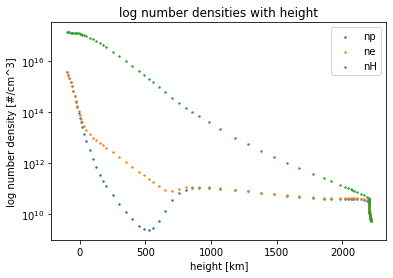

In [119]:
#plt.scatter(falc_data.height, np.log10(falc_data.n_p), s=2, label='np')
#plt.scatter(falc_data.height, np.log10(falc_data.n_e), s=2, label='ne')
#plt.scatter(falc_data.height, np.log10(falc_data.n_H), s=2, label='nH')
#plt.plot(falc_data.height, np.log10(falc_data.n_p), label='np')
#plt.plot(falc_data.height, np.log10(falc_data.n_e), label='ne')
#plt.plot(falc_data.height, np.log10(falc_data.n_H), label='nH')
plt.scatter(falc_data.height, falc_data.n_p, s=2, label='np')
plt.scatter(falc_data.height, falc_data.n_e, s=2, label='ne')
plt.scatter(falc_data.height, falc_data.n_H, s=2, label='nH')
plt.title('log number densities with height')
plt.xlabel('height [km]')
plt.ylabel('log number density [#/cm^3]')
plt.legend()
plt.yscale('log')
plt.show()

The number density of protons drops going higher up the photosphere and then increases until the temperature in the chromosphere gets high enough to ionize hydrogen again. This makes sense because protons (H+) are the same as ionized hydrogen, so this ionization should increase the proton number density. The threshold at which this occurs is the height where $n_p$ and $n_e$ coincide. Of course, this means $n_H$ decreases, since the supply of neutral hydrogen is being ionized - although the overall number density of particles should decrease with height, as optical depth decreases. This is corroborated by noting how the ionization fraction profile is similar to the temperature-height profile. 

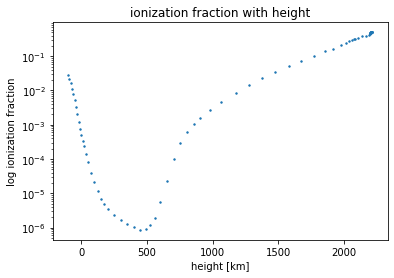

In [118]:
plt.scatter(falc_data.height, falc_data.n_p/(falc_data.n_H+falc_data.n_p), s=2)
plt.title('ionization fraction with height')
plt.xlabel('height [km]')
plt.ylabel('log ionization fraction')
plt.yscale('log')
plt.show()

### d

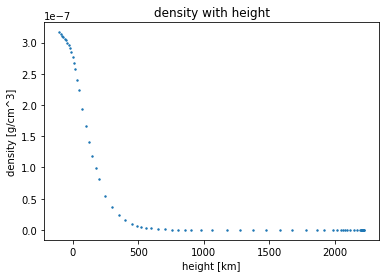

In [117]:
plt.scatter(falc_data.height, falc_data.rho, s=2)
plt.title('density with height')
plt.xlabel('height [km]')
plt.ylabel('density [g/cm^3]')
#plt.yscale('log')
plt.show()

2.771e-07


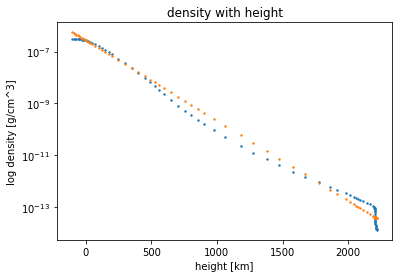

solar radius in H_rhos:  4971.428571428572
solar atmosphere in H_rhos:  16.558571428571426


In [116]:
rho0 = falc_data.loc[falc_data.height==0.0].rho[69]
print(rho0)
def rho(height, H_rho):
    #print(height)
    #print(rho0*np.exp(-height/H_rho))
    return rho0*np.exp(-height/H_rho)

plt.scatter(falc_data.height, falc_data.rho, s=2)
plt.scatter(falc_data.height, rho(falc_data.height, 140), s=2) 
plt.title('density with height')
plt.xlabel('height [km]')
plt.ylabel('log density [g/cm^3]')
plt.yscale('log')
plt.show()

solar_radius = 696000 # km
print("solar radius in H_rhos: ", solar_radius/140)
print("solar atmosphere in H_rhos: ", (max(falc_data.height)-min(falc_data.height))/140)

After trying multiple scale height values, I settled on 140 km as the value that best fits (by eye) the density-height profile. This results in a scale height that's 1/5000th of the radius of the Sun, or 1/17th the Solar atmosphere. 

### e

0          0.076974
1          0.077059
2          0.077127
3          0.077234
4          0.077384
          ...      
75    148336.056780
76    155289.814260
77    162087.276500
78    168724.025260
79    175340.615800
Length: 80, dtype: float64


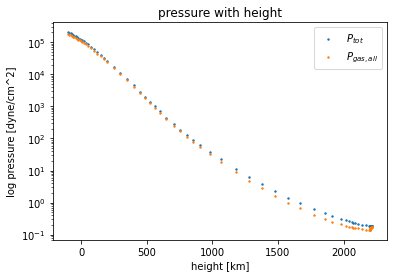

In [131]:
def ideal_gas_pressure(n, T): # pressure = n*k*T
    kB = 1.3807e-16 # cm^2 g s^-2 K^-1
    return n*kB*T

print(ideal_gas_pressure(falc_data.n_H, falc_data.temp))
plt.scatter(falc_data.height, falc_data.ptot, s=2, label='$P_{tot}$')
#plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H, falc_data.temp), s=2, label='$P_{gas, H-only}$') 
plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H+falc_data.n_e, # since H includes free protons
                                                 falc_data.temp), s=2, label='$P_{gas, all}$') 

plt.title('pressure with height')
plt.xlabel('height [km]')
plt.ylabel('log pressure [dyne/cm^2]')
plt.yscale('log')
plt.legend()
plt.show()

Using the number density for HI only to calculate the ideal gas pressure results in underestimating the pressure at the surface of the atmosphere (compared to the model), which makes sense because I'm not counting the contribution to the pressure from the protons and electrons. Adding them in makes my ideal gas pressure profile match up to that of the model.

### f

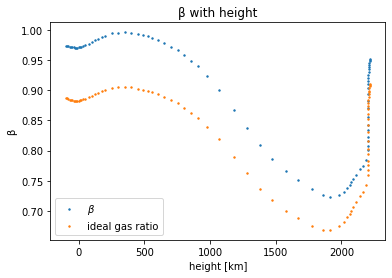

In [137]:
plt.scatter(falc_data.height, falc_data.beta, s=2, label=r'$\beta$')
plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H+falc_data.n_e, 
                                                 falc_data.temp)/falc_data.ptot, s=2, label='ideal gas ratio') 
#plt.scatter(falc_data.height, ideal_gas_pressure(falc_data.n_H, 
#                                                 falc_data.temp)/falc_data.ptot, s=2, label='ideal gas ratio w/H') 
plt.title('β with height')
plt.xlabel('height [km]')
plt.ylabel('β')
#plt.yscale('log')
plt.legend()
plt.show()

The $P_{gas}$ to $P_{tot}$ ratios follow the same profile, modulo some contribution, presumably from radiation. The ideal gas ratio may underpredict $P_{gas}$ closer to the surface because the ideal gas law assumes that the distance between particles is much larger than particle sizes, which is consistent with how the two ratios converge as the atmosphere density decreases with height.

### g

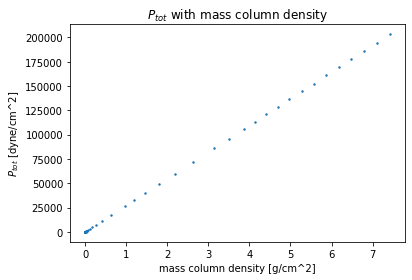

model assumed surface gravity of:  27398.185100288993


In [139]:
plt.scatter(falc_data.m, falc_data.ptot, s=2)
plt.title('$P_{tot}$ with mass column density')
plt.xlabel('mass column density [g/cm^2]')
plt.ylabel('$P_{tot}$ [dyne/cm^2]')
#plt.yscale('log')
plt.show()

print("model assumed surface gravity of: ", np.mean(falc_data.ptot/falc_data.m))

### h